In [1]:
import glob
import cv2
import os
import shutil
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

## Load image paths

In [2]:
exts = ('png', 'jpg', 'jpeg', 'JPG')
img_paths = []
for ext in exts:
    img_paths.extend(glob.glob(f'CXR/*/*/*.{ext}'))

len(img_paths)

15537

## Simple test

In [3]:
def apply_contrast(img):
    img = Image.fromarray(img)
    return transforms.ColorJitter(contrast=(2.0, 2.5))(img)

In [4]:
def display_augmented_images(img1, img2):
    fig, subplots = plt.subplots(1, 2, figsize=(13, 6))
    axi1 = subplots.flat[0]
    axi2 = subplots.flat[1]
    
    axi1.imshow(img1)
    axi2.imshow(img2)
    axi1.set_title('original')
    axi2.set_title('contrast')

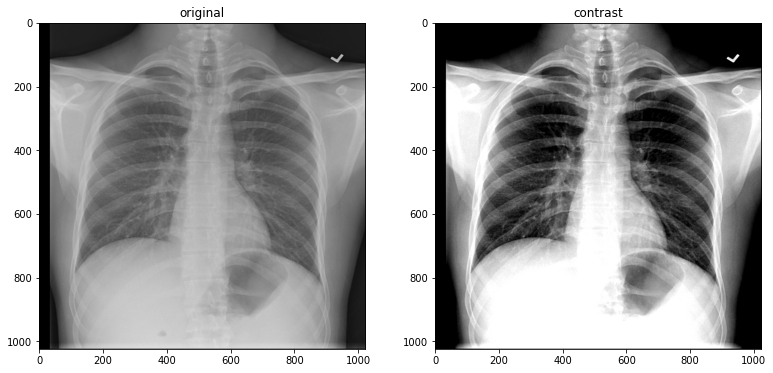

In [5]:
img = cv2.imread(img_paths[0])
img_with_con = apply_contrast(img)
display_augmented_images(img, img_with_con)

## Apply contrast to images and save images

In [6]:
base_tdir = 'CXR_with_contrast'
if os.path.isdir(base_tdir):
    shutil.rmtree(base_tdir)
    
dtypes = ('train', 'test')
cls_names = ('covid-19', 'pneumonia', 'normal')
for dtype in dtypes:
    for cls_name in cls_names:
        os.makedirs(f'{base_tdir}/{dtype}/{cls_name}')

In [7]:
def get_target_img_path(img_path):
    dtypes = ('train', 'test')
    img_name = img_path.split('/')[-1]
    for dtype in dtypes:
        if dtype in img_path:
            new_img_name = f'{dtype[:2]}_{img_name}'
            break
            
    img_path = img_path.replace('CXR', 'CXR_with_contrast')
    img_path = img_path.replace(img_name, new_img_name)
    return img_path

In [8]:
for i, img_path in enumerate(img_paths):
    img = cv2.imread(img_path)
    img_with_con = apply_contrast(img)
    
    t_img_path = get_target_img_path(img_path)
    img_with_con.save(t_img_path)
    
    if i % (len(img_paths)//10) == 0:
        print(f'{i / (len(img_paths)//10):.4f}% completed.')
        
    del img, img_with_con

0.0000% completed.
1.0000% completed.
2.0000% completed.
3.0000% completed.
4.0000% completed.
5.0000% completed.
6.0000% completed.
7.0000% completed.
8.0000% completed.
9.0000% completed.
10.0000% completed.
